<a href="https://colab.research.google.com/github/mljarman/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


#Part 1: Confidence Intervals

In [43]:
# import the voting dataset:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-10-09 15:24:22--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.1’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2019-10-09 15:24:22 (285 KB/s) - ‘house-votes-84.data.1’ saved [18171/18171]



In [120]:
df = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
print(df.shape)
df.head(2)

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?


In [0]:
# changing y's and n's to 1's and 0's and ?'s to NaNs':
df=df.replace({'?' : np.NaN, 'n':0, 'y':1})

In [122]:
df.isnull().sum()

party                     0
handicapped-infants      12
water-project            48
budget                   11
physician-fee-freeze     11
el-salvador-aid          15
religious-groups         11
anti-satellite-ban       14
aid-to-contras           15
mx-missile               22
immigration               7
synfuels                 21
education                31
right-to-sue             25
crime                    17
duty-free                28
south-africa            104
dtype: int64

In [123]:
df1= df.dropna(subset = ['crime', 'immigration'])
print(df1['crime'].isnull().sum())
df1['immigration'].isnull().sum()

0


0

##Numerical Representation

In [0]:
from scipy import stats

def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  margin = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - margin, mean + margin)

In [0]:
# looking at the crime bill:
crime_data = df1['crime']

In [89]:
confidence_interval(crime_data, confidence=.95)

(0.5956416464891041, 0.5481132795036653, 0.643170013474543)

If we were to repeat this process, we are 95% sure we would expect the crime legislation to pass 55-64% of the time. 






In [0]:
# looking at the immigration bill:
imm_data = df1['immigration']

In [52]:
confidence_interval(imm_data, confidence=.95)

(0.5084745762711864, 0.4600590374032899, 0.5568901151390829)

If we were to repeat this process, we are 95% sure we would expect the immigration bill to pass 46-56% of the time.

## Graphical Representation

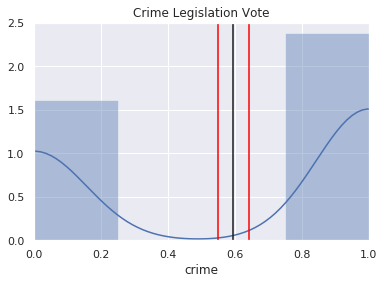

In [116]:
import seaborn as sns
fig.patch.set(facecolor='white')
sns.distplot(crime_data)
CI = confidence_interval(crime_data)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k')
plt.xlim(0, 1)
plt.title('Crime Legislation Vote');

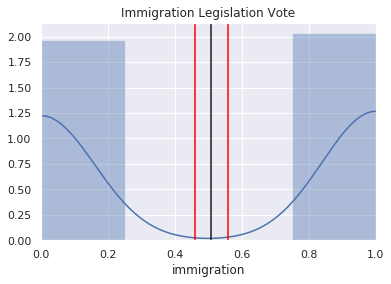

In [124]:
fig.patch.set(facecolor='white')
sns.distplot(imm_data)
CI = confidence_interval(imm_data)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k')
plt.xlim(0, 1)
plt.title('Immigration Legislation Vote');

#Part 2: Chi-squared tests


## Numpy Attempt


In [0]:
import pandas as pd
import numpy as np

In [0]:
# import the heart disease dataset previously used:
heart_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(heart_url)

In [57]:
# needed to add in column headers:
header_columns = ['#3 (age)' , '#4 (sex)' , '#9 (cp)' , '#10 (trestbps)' , 
                  '#12 (chol)' , '#16 (fbs)' , '#19 (restecg)' , '#32 (thalach)' ,
                  '#38 (exang)' , '#40 (oldpeak)' , '#41 (slope)' , '#44 (ca)' ,
                  '#51 (thal)' , '#58 (num) (the predicted attribute)']
df = pd.read_csv(heart_url, names=header_columns)
df.head(2)

,#3 (age),#4 (sex),#9 (cp),#10 (trestbps),#12 (chol),#16 (fbs),#19 (restecg),#32 (thalach),#38 (exang),#40 (oldpeak),#41 (slope),#44 (ca),#51 (thal),#58 (num) (the predicted attribute)
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2


In [58]:
# check for missing values:
df.isnull().sum()

#3 (age)                               0
#4 (sex)                               0
#9 (cp)                                0
#10 (trestbps)                         0
#12 (chol)                             0
#16 (fbs)                              0
#19 (restecg)                          0
#32 (thalach)                          0
#38 (exang)                            0
#40 (oldpeak)                          0
#41 (slope)                            0
#44 (ca)                               0
#51 (thal)                             0
#58 (num) (the predicted attribute)    0
dtype: int64

In [59]:
df['#12 (chol)'].value_counts().sum()

303

In [60]:
# null hypothesis of Chi-squared test is that the 2 variables are independent of
# each other. 

# in this case I am going to test the relationship between sex and cholesterol level.

# per webmd there are 3 categories of cholesterol so will bin the values 
# from the dataset.
bins = ['less than 200 (desirable)', '200-239 (borderline high)', '240 + (high)']
cut_points = [0, 200, 239, 600]
df['binned_chol'] = pd.cut(df['#12 (chol)'], cut_points, labels = bins)
df.head(2)

,#3 (age),#4 (sex),#9 (cp),#10 (trestbps),#12 (chol),#16 (fbs),#19 (restecg),#32 (thalach),#38 (exang),#40 (oldpeak),#41 (slope),#44 (ca),#51 (thal),#58 (num) (the predicted attribute),binned_chol
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,200-239 (borderline high)
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,240 + (high)


In [61]:
# value count to verify crosstab numbers are correct:
df['binned_chol'].value_counts()

# confirmed that there were 303 values in the cholesterol column (1 is header)
# 303 values were binned so no entries were missed.

240 + (high)                 156
200-239 (borderline high)     97
less than 200 (desirable)     50
Name: binned_chol, dtype: int64

In [62]:
# create a crosstab of those variables:
crosstab_totals = pd.crosstab(df['#4 (sex)'], df['binned_chol'], margins = True)
crosstab_totals

binned_chol,less than 200 (desirable),200-239 (borderline high),240 + (high),All
#4 (sex),,,,
0.0,14,24,59,97
1.0,36,73,97,206
All,156,50,97,303


In [63]:
crosstab = pd.crosstab(df['#4 (sex)'], df['binned_chol'])
crosstab

binned_chol,less than 200 (desirable),200-239 (borderline high),240 + (high)
#4 (sex),,,
0.0,14,24,59
1.0,36,73,97


In [64]:
# male count (reflected as 1 on dataset)
#used later to plot
male_count = crosstab.iloc[1].values
male_count

array([36, 73, 97])

In [65]:
# female count (relected as 0 on dataset)
#used later to plot
female_count = crosstab.iloc[0].values
female_count

array([14, 24, 59])

In [66]:
#Expected Value Calculation:
row_sums = crosstab_totals.iloc[0:2, 3].values
print(row_sums)
column_sums = crosstab_totals.iloc[2, 0:3].values
print(column_sums)
 

[ 97 206]
[156  50  97]


In [67]:
total = crosstab_totals.loc['All', 'All']
total

303

In [68]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in column_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 3)
[[ 49.94059406  16.00660066  31.05280528]
 [106.05940594  33.99339934  65.94719472]]


In [69]:
# the data in the table:
observed = pd.crosstab(df['#4 (sex)'], df['binned_chol']).values
print(observed.shape)
print(observed)

(2, 3)
[[14 24 59]
 [36 73 97]]


In [70]:
# calculate chi-squared value:
chi_squared = ((observed - expected)**2/(expected)).sum()
print('Chi-Squared:', chi_squared)

Chi-Squared: 160.66924282369595


In [71]:
# degrees of freedom of chi-squared test:
# adding this in for notes: degrees of freedom = (num_rows -1)(num_columns-1)

dof = (len(row_sums)-1)*(len(column_sums)-1)
print('Degrees of Freedom:', dof)

Degrees of Freedom: 2


## Scipy Attempt

In [0]:
from scipy import stats

In [73]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print('Chi-Squared:' , chi_squared)
print('P-Value:', p_value)
print('Degrees of Freedom:', dof)
print('Expected: \n', np.array(expected))

Chi-Squared: 5.1433697873685045
P-Value: 0.07640669974292433
Degrees of Freedom: 2
Expected: 
 [[ 16.00660066  31.05280528  49.94059406]
 [ 33.99339934  65.94719472 106.05940594]]


## Null hypothesis is that cholesterol level is independent of sex.

###Due to the p-value being .07, we reject the null hypothesis that cholesterol level and sex are independent of each other and conclude there is an association between the two.


In [0]:
# Plot results:
import matplotlib.pyplot as plt
import seaborn as sns


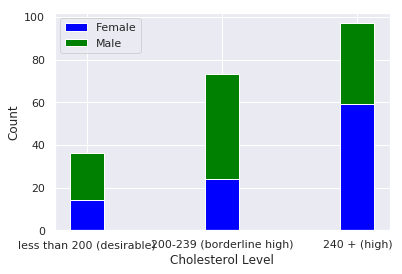

In [110]:
sns.set(font_scale=1)
fig.patch.set(facecolor='white')
categories = ['less than 200 (desirable)', '200-239 (borderline high)', '240 + (high)']
p1 = plt.bar(categories, male_count, .25, color='green')
p2 = plt.bar(categories, female_count, .25, color = 'blue')
plt.legend((p2[1], p1[1]), ('Female', 'Male'))
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.show()


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)